In [1]:
import pandas as pd
from pandas import read_csv
import re
import json
import bz2
import os


In [2]:
data = pd.read_csv('BostonCrime.csv')
#explain data set

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


This Boston Crime Dataset comes from the 2020 Crime Incident Reports. The dataset contains records which include a reduced set of fields focused on capturing the type of incident as well as when and where it ocurred. 

In [3]:
#Cleaning the dataframe to only include columns we will use from t 
df_crime_filtered = data[['OFFENSE_DESCRIPTION', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'Lat', 'Long', 'Location']]
df_crime_filtered

,OFFENSE_DESCRIPTION,YEAR,MONTH,DAY_OF_WEEK,Lat,Long,Location
0,INVESTIGATE PERSON,2020,2,Thursday,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
1,INVESTIGATE PERSON,2020,2,Friday,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
2,FRAUD - CREDIT CARD / ATM FRAUD,2020,4,Friday,42.339542,-71.069409,"(42.3395419898301, -71.0694087696754)"
3,FRAUD - WELFARE,2020,5,Friday,42.370818,-71.039291,"(42.3708180467024, -71.0392907813515)"
4,HARASSMENT/ CRIMINAL HARASSMENT,2020,9,Monday,42.361839,-71.059765,"(42.3618385665647, -71.0597648909416)"
...,...,...,...,...,...,...,...
70889,INVESTIGATE PROPERTY,2020,9,Tuesday,42.374427,-71.035279,"(42.3744269722053, -71.0352787630199)"
70890,FRAUD - IMPERSONATION,2020,8,Friday,42.256216,-71.124019,"(42.2562159204022, -71.1240194732902)"
70891,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,2020,7,Thursday,42.305761,-71.083772,"(42.3057609263196, -71.0837715727385)"
70892,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,2020,6,Wednesday,42.323808,-71.089150,"(42.3238077563779, -71.0891502345332)"


In [4]:
#read in yelp json
# business_df = pd.read_json('yelp_academic_dataset_business.json', lines = True)
#CLAIRE HAS THIS DATA, I DID NOT HAVE ENOUGH STORAGE

In [5]:
#CLAIRE GOT CSV FROM A JSON^^

In [6]:
yelp = pd.read_csv('yelp_boston_businesses.csv')

In [7]:
def get_lat(series):
    pattern = r'(-?\d{2}.\d{3})'
    lat = re.match(pattern, str(series))
    if lat is not None:
        return lat.group(0)
    else:
        return str(series)[0:6]

def get_long(series):
    pattern = r'(-?\d{2}.\d{3})'
    long = re.match(pattern, str(series))
    if long is not None:
        return long.group(0)
    else:
        return str(series)[0:6]

df_crime_filtered['Lat'] = df_crime_filtered['Lat'].map(get_lat)
df_crime_filtered['Long'] = df_crime_filtered['Long'].map(get_long)


/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
df_crime_filtered['Long']

0        -71.091
1        -71.091
2        -71.069
3        -71.039
4        -71.059
          ...   
70889    -71.035
70890    -71.124
70891    -71.083
70892    -71.089
70893    -71.047
Name: Long, Length: 70894, dtype: object

In [9]:
def replace_location(df):
    return (df['Lat'], df['Long'])

df_crime_filtered['Location'] = df_crime_filtered.apply(replace_location, axis=1)

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
df_crime_filtered

,OFFENSE_DESCRIPTION,YEAR,MONTH,DAY_OF_WEEK,Lat,Long,Location
0,INVESTIGATE PERSON,2020,2,Thursday,42.333,-71.091,"(42.333, -71.091)"
1,INVESTIGATE PERSON,2020,2,Friday,42.333,-71.091,"(42.333, -71.091)"
2,FRAUD - CREDIT CARD / ATM FRAUD,2020,4,Friday,42.339,-71.069,"(42.339, -71.069)"
3,FRAUD - WELFARE,2020,5,Friday,42.370,-71.039,"(42.370, -71.039)"
4,HARASSMENT/ CRIMINAL HARASSMENT,2020,9,Monday,42.361,-71.059,"(42.361, -71.059)"
...,...,...,...,...,...,...,...
70889,INVESTIGATE PROPERTY,2020,9,Tuesday,42.374,-71.035,"(42.374, -71.035)"
70890,FRAUD - IMPERSONATION,2020,8,Friday,42.256,-71.124,"(42.256, -71.124)"
70891,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,2020,7,Thursday,42.305,-71.083,"(42.305, -71.083)"
70892,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,2020,6,Wednesday,42.323,-71.089,"(42.323, -71.089)"


In [11]:
yelp = yelp.dropna(subset = ['latitude'])
yelp = yelp.dropna(subset = ['longitude'])

In [12]:
#now cleaning yelp dataset using the get_lat and get_long functions
yelp['latitude'] = yelp['latitude'].apply(get_lat)
yelp['longitude'] = yelp['longitude'].apply(get_long)

def replace_location_yelp(yelp):
    return (yelp['latitude'], yelp['longitude'])

yelp['Location'] = yelp.apply(replace_location_yelp, axis=1)

In [13]:
yelp

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Location
0,26,hcRxdDg7DYryCxCoI8ySQA,Longwood Galleria,340-350 Longwood Ave,Boston,MA,2215.0,42.338,-71.106,2.5,24,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Restaurants, Shopping, Shopping Centers","{'Monday': '6:30-22:0', 'Tuesday': '6:30-22:0'...","(42.338, -71.106)"
1,29,jGennaZUr2MsJyRhijNBfA,Legal Sea Foods,1 Harborside Dr,Boston,MA,2128.0,42.363,-71.025,3.5,856,1,"{'NoiseLevel': ""u'average'"", 'BikeParking': 'F...","Sandwiches, Food, Restaurants, Breakfast & Bru...","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ...","(42.363, -71.025)"
2,35,iPD8BBvea6YldQZPHzVrSQ,Espresso Minute,334 Mass Ave,Boston,MA,2115.0,42.342,-71.084,4.5,7,0,"{'NoiseLevel': ""'quiet'"", 'GoodForKids': 'True...","Creperies, Restaurants, Food, Coffee & Tea, Br...","{'Tuesday': '8:0-20:0', 'Wednesday': '8:0-20:0...","(42.342, -71.084)"
3,89,WuoNSCjFBH4OQTSNGc4l6w,Toscana European Day Spa & Salon,231 Newbury St,Boston,MA,2116.0,42.350,-71.081,4.0,138,1,"{'ByAppointmentOnly': 'False', 'BusinessParkin...","Beauty & Spas, Hair Salons, Active Life, Day Spas","{'Tuesday': '10:0-18:0', 'Wednesday': '10:0-20...","(42.350, -71.081)"
4,154,zHMsnpMPanzRx-A6AwGSdw,Ecco Beauty Hair Salon,"2 Boylston St, Ste 101",Boston,MA,2116.0,42.352,-71.063,3.5,42,1,"{'BusinessParking': ""{'garage': True, 'street'...","Day Spas, Tanning, Hair Stylists, Massage, Spr...","{'Monday': '10:0-20:0', 'Wednesday': '11:0-18:...","(42.352, -71.063)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8258,160501,pXj9QQVummN5ANuseK4CvQ,All Star Pizza Bar,204 Cambridge St,Boston,MA,2114.0,42.360,-71.065,4.5,87,0,"{'BikeParking': 'True', 'GoodForMeal': ""{'dess...","Pizza, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...","(42.360, -71.065)"
8259,160527,dWIMHmdKbBUeGVqRPMAc9w,JP Oil,525 Centre St,Boston,MA,2130.0,42.317,-71.113,2.5,5,1,NaN,"Gas Stations, Automotive",NaN,"(42.317, -71.113)"
8260,160531,TmrSdCqKqzrv0rhCHnJOsA,MassMoving,NaN,Boston,MA,2445.0,42.332,-71.138,5.0,6,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Movers","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...","(42.332, -71.138)"
8261,160532,o7gK1JweWUr9jGwYzF1Olg,Harrison Deli and Pizza,805 Harrison Ave,Boston,MA,2118.0,42.335,-71.074,3.5,8,0,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Pizza, Delis, Restaurants",NaN,"(42.335, -71.074)"


In [14]:
crimes_by_location = df_crime_filtered.groupby('Location').size().reset_index(name="Crimes in Business Area")
crimes_by_location = pd.DataFrame(crimes_by_location)
crimes_by_location

,Location,Crimes in Business Area
0,"(0.0, 0.0)",1747
1,"(1.3272, 5.2496)",1
2,"(42.232, -71.130)",1
3,"(42.232, -71.131)",2
4,"(42.233, -71.128)",8
...,...,...
6408,"(42.393, -71.010)",3
6409,"(42.393, -71.011)",30
6410,"(42.394, -71.010)",1
6411,"(42.394, -71.067)",12


In [15]:
# df_crime_filtered = data[['OFFENSE_DESCRIPTION', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'Lat', 'Long', 'Location']]
yelp = yelp[['name', 'address', 'city', 'state', 'latitude', 'longitude', 'stars', 'review_count', 'categories', 'Location']]

In [16]:
merging_crimecount_and_yelp = yelp.merge(crimes_by_location, how="outer")

In [17]:
# merged_cereals = cereal_df2.merge(cereal_df3, how="outer", left_index=True, right_index=True, suffixes=("_1", "_2"))

In [18]:
merging_crimecount_and_yelp = merging_crimecount_and_yelp.dropna()
merging_crimecount_and_yelp

,name,address,city,state,latitude,longitude,stars,review_count,categories,Location,Crimes in Business Area
0,Longwood Galleria,340-350 Longwood Ave,Boston,MA,42.338,-71.106,2.5,24.0,"Restaurants, Shopping, Shopping Centers","(42.338, -71.106)",15.0
1,Longwood Barbershop,342 Longwood Ave,Boston,MA,42.338,-71.106,4.0,37.0,"Barbers, Beauty & Spas","(42.338, -71.106)",15.0
2,Sakura,350 Longwood Ave,Boston,MA,42.338,-71.106,3.0,9.0,"Fast Food, Japanese, Restaurants","(42.338, -71.106)",15.0
3,Noodles King,400 Brookline Ave,Boston,MA,42.338,-71.106,4.0,36.0,"Chinese, Food Court, Restaurants, Noodles","(42.338, -71.106)",15.0
4,Dairy Queen,350 Longwood Ave,Boston,MA,42.338,-71.106,3.0,6.0,"Food, Ice Cream & Frozen Yogurt","(42.338, -71.106)",15.0
...,...,...,...,...,...,...,...,...,...,...,...
8254,"The Liberty, a Luxury Collection Hotel, Boston",215 Charles St,Boston,MA,42.361,-71.070,3.5,623.0,"Hotels, Event Planning & Services, Venues & Ev...","(42.361, -71.070)",17.0
8255,Scampo,215 Charles St,Boston,MA,42.361,-71.070,4.0,569.0,"Wine Bars, Bars, Restaurants, Nightlife, Break...","(42.361, -71.070)",17.0
8256,It's A Wrap,100 Morrissey Blvd,Boston,MA,42.315,-71.048,3.0,6.0,"Sandwiches, Restaurants","(42.315, -71.048)",1.0
8257,The Braces Place,1792 Dorchester Ave,Boston,MA,42.289,-71.063,1.5,17.0,"Dentists, Health & Medical, Pediatric Dentists...","(42.289, -71.063)",14.0


In [19]:
merging_crimecount_and_yelp['Location']

0       (42.338, -71.106)
1       (42.338, -71.106)
2       (42.338, -71.106)
3       (42.338, -71.106)
4       (42.338, -71.106)
              ...        
8254    (42.361, -71.070)
8255    (42.361, -71.070)
8256    (42.315, -71.048)
8257    (42.289, -71.063)
8262    (42.317, -71.113)
Name: Location, Length: 6603, dtype: object

In [20]:
merging_crimecount_and_yelp['Crimes in Business Area'].sort_values(ascending=False)

7895    2283.0
5680    1671.0
7179    1368.0
6487    1232.0
6488    1232.0
         ...  
1960       1.0
7541       1.0
7532       1.0
1912       1.0
3421       1.0
Name: Crimes in Business Area, Length: 6603, dtype: float64

In [21]:
# This is where the most crimes are
most_crime_row = merging_crimecount_and_yelp[merging_crimecount_and_yelp['Crimes in Business Area']== 2283.0]
most_crime_row

,name,address,city,state,latitude,longitude,stars,review_count,categories,Location,Crimes in Business Area
7895,Boston Police Department,650 Harrison Ave,Boston,MA,42.339,-71.069,2.0,20.0,Public Services & Government,"(42.339, -71.069)",2283.0


In [22]:
#This is where the second most amount of crimes are
second_most_crime_row = merging_crimecount_and_yelp[merging_crimecount_and_yelp['Crimes in Business Area']== 1671.0]
second_most_crime_row

,name,address,city,state,latitude,longitude,stars,review_count,categories,Location,Crimes in Business Area
5680,Kabloom,27 School St,Boston,MA,42.361,-71.059,2.0,6.0,"Florists, Flowers & Gifts, Shopping","(42.361, -71.059)",1671.0


In [23]:
third__most_crime_row = merging_crimecount_and_yelp[merging_crimecount_and_yelp['Crimes in Business Area']== 1368.0]
third__most_crime_row

,name,address,city,state,latitude,longitude,stars,review_count,categories,Location,Crimes in Business Area
7179,Michael's Sports Massage,"17 Henshaw St, Ste 2B",Boston,MA,42.349,-71.150,4.5,16.0,"Massage Therapy, Sports Medicine, Massage, Doc...","(42.349, -71.150)",1368.0


In [24]:
fourth__most_crime_row = merging_crimecount_and_yelp[merging_crimecount_and_yelp['Crimes in Business Area']== 1232.0]
fourth__most_crime_row

,name,address,city,state,latitude,longitude,stars,review_count,categories,Location,Crimes in Business Area
6487,Simply Barre,118 W Broadway S,Boston,MA,42.341,-71.054,4.5,21.0,"Fitness & Instruction, Barre Classes, Active Life","(42.341, -71.054)",1232.0
6488,Salon 120 West,120 W Broadway,Boston,MA,42.341,-71.054,4.5,7.0,"Hair Salons, Beauty & Spas","(42.341, -71.054)",1232.0


**Making Visualizations**

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

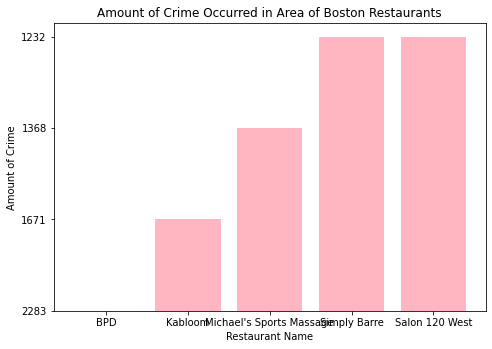

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
restaurants = ['BPD', 'Kabloom', "Michael's Sports Massage", 'Simply Barre', 'Salon 120 West']
amount_of_crime_in_area = ['2283', '1671', '1368', '1232', '1232']
ax.bar(restaurants, amount_of_crime_in_area, color='lightpink')
ax.set_title('Amount of Crime Occurred in Area of Boston Restaurants')
ax.set_xlabel('Restaurant Name')
ax.set_ylabel('Amount of Crime')
plt.show()

In [ ]:
#One visualization is crime per location

In [ ]:
#One visualization is restaurant by crime . 
#Then after looking at that visualization, read the review for the restruants with the highest and lowest 
#amounts of crime in their areas and compare 

In [ ]:
#bar plot with resturant name and crime in that location

**businesses with most crime:**

1.Boston Police Department

2.Kabloom

3.Michael's Sports Massage

4.Simply Barre

5.Salon 120 West


**MAIN Q!! do resturants in safer areas have higher reviews?**